# IBM Capstone Project - Battle of Neighborhoods 
# Setting up Diagnostic and Treatment Center in New York State
:
## Analysis of Clusters of neighborhoods in Brooklyn city for establishment of a new health care facility.

This project is an initiative to help provide valuable information to a health care business entrepreneurs who would like to start a new venture in health care industry by developing a new Diagnostic and treatment center in the city of Brooklyn. The data from different health care facilities with their geographical coordinates in the city of Brooklyn, New York will be used for analyzing different neighborhoods that can be conducive for establishing a new diagnostic treatment center. 
The hospital data for New York State with their geographical coordinates is available on the website (https://health.data.ny.gov/Health/Health-Facility-General-Information/vn5v-hh5r/data). The data has been imported in to a Pandas dataframe and has been cleaned to perform analysis using KMeans Algorithm to form clusters of different health care facililities. The information gained from surrounding neighborhoods in these clusters has been used to make important conclusions regarding the set up of a new diagnostic and treatment center.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans
#importing seaborn plotting library
import seaborn as sns
import folium # map rendering library
print("Libraries imported.")

Libraries imported.


### Get the data set

In [3]:
#Importing Hospital Facility Data for New York state in to a Pandas data frame.
hospital_df = pd.read_csv('Health_Facility_General_Information (2).csv')

In [4]:
hospital_df.head(4) # Analyzing the first 4 rows of the Data

Facility ID                                   Facility Name  \
0          620         Charles T Sitrin Health Care Center Inc   
1          654  Central Park Rehabilitation and Nursing Center   
2          970        Roscoe Rehabilitation and Nursing Center   
3         1465                 Rockefeller University Hospital   

  Short Description                             Description  \
0                NH  Residential Health Care Facility - SNF   
1                NH  Residential Health Care Facility - SNF   
2                NH  Residential Health Care Facility - SNF   
3              HOSP                                Hospital   

  Facility Open Date           Facility Address 1 Facility Address 2  \
0         02/01/1989           2050 Tilden Avenue                NaN   
1         02/01/1989  116 Martin Luther King East                NaN   
2         01/01/1901            420 Rockland Road                NaN   
3         01/01/1901             1230 York Avenue                NaN   

  Facility City Facility State Facility Zip Code  Facility Phone Number  \
0  New Hartford       New York             13413           3.157973e+09   
1      Syracuse       New York             13205           3.154752e+09   
2        Roscoe       New York             12776           6.074984e+09   
3      New York       New York             10021           2.123278e+09   

   Facility Fax Number Facility Website  Facility County Code Facility County  \
0                  NaN              NaN                    32          Oneida   
1                  NaN              NaN                    33        Onondaga   
2         6.074986e+09              NaN                    52        Sullivan   
3                  NaN              NaN                  7093        New York   

   Regional Office ID                                    Regional Office  \
0                   3                   Central New York Regional Office   
1                   3                   Central New York Regional Office   
2                   6   Metropolitan Area Regional Office - New Rochelle   
3                   5  Metropolitan Area Regional Office - New York City   

  Main Site Name  Main Site Facility ID Operating Certificate Number  \
0            NaN                    NaN                     3227304N   
1            NaN                    NaN                     3301326N   
2            NaN                    NaN                     5262301N   
3            NaN                    NaN                     7002031H   

                              Operator Name           Operator Address 1  \
0  Charles T Sitrin Health Care Center, Inc       Box 1000 Tilden Avenue   
1                                CPRNC, LLC  116 Martin Luther King East   
2           Roscoe Regional Healthcare, LLC  230 Hilton Avenue - Suite 4   
3            The Rockefeller University Inc             1230 York Avenue   

  Operator Address 2 Operator City Operator State Operator Zip Code  \
0                NaN  New Hartford       New York             13413   
1                NaN      Syracuse       New York             13205   
2                NaN     Hempstead       New York             11550   
3                NaN      New York       New York             10021   

  Cooperator Name Cooperator Address Cooperator Address 2 Cooperator City  \
0             NaN                NaN                  NaN             NaN   
1             NaN                NaN                  NaN             NaN   
2             NaN                NaN                  NaN             NaN   
3             NaN                NaN                  NaN             NaN   

  Cooperator State  Cooperator Zip Code              Ownership Type  \
0         New York                  NaN  Not for Profit Corporation   
1         New York                  NaN                         LLC   
2         New York                  NaN                         LLC   
3         New York                  NaN  Not for Profit Corporat

In [5]:
hospital_df.shape # Checking the size of the data frame

(1420, 36)

### What types of health care facilities exist, in data set this is Description column 

In [6]:
hospital_df['Description'].unique() #Checking the different kinds of health care facilities

array(['Residential Health Care Facility - SNF', 'Hospital',
       'Diagnostic and Treatment Center',
       'School Based Primary Care Hospital - Critical Access Extension Clinic',
       'Mobile Hospital Extension Clinic',
       'Primary Care Hospital - Critical Access Hospital'], dtype=object)

### Clean the data
1. Drop the columns that are not required for analysis
2. Drop the rows in which co-ordinates (Latitude or Longitude) are NaN

In [7]:
#Drop the columns that are not required for analysis
hospital_df = hospital_df[['Facility Name', 'Facility City', 'Description', 'Facility Open Date', 'Facility Address 1', 'Facility State', 'Facility Zip Code', 'Facility Latitude', 'Facility Longitude', 'Ownership Type']]

In [8]:
hospital_df.head(3) # Analyzing the first three rows of reformed dataframe

Facility Name Facility City  \
0         Charles T Sitrin Health Care Center Inc  New Hartford   
1  Central Park Rehabilitation and Nursing Center      Syracuse   
2        Roscoe Rehabilitation and Nursing Center        Roscoe   

                              Description Facility Open Date  \
0  Residential Health Care Facility - SNF         02/01/1989   
1  Residential Health Care Facility - SNF         02/01/1989   
2  Residential Health Care Facility - SNF         01/01/1901   

            Facility Address 1 Facility State Facility Zip Code  \
0           2050 Tilden Avenue       New York             13413   
1  116 Martin Luther King East       New York             13205   
2            420 Rockland Road       New York             12776   

   Facility Latitude  Facility Longitude              Ownership Type  
0           43.05497          -75.228828  Not for Profit Corporation  
1                NaN                 NaN                         LLC  
2           41.96225          -74.907913                         LLC

In [9]:
#Drop the rows in which co-ordinates (Latitude or Longitude) are NaN
hospital_df.dropna(subset=['Facility Latitude', 'Facility Longitude'], axis = 0, inplace = True)

In [10]:
hospital_df.shape #Checking the size of cleaned Data Frame.

(1399, 10)

### Which borough is suitable to start a Diagonstic and Treatment Center?
1. Get 'Age' of health care facilities in different boroughs (Facility City in data set)
2. Get 'Ownership Type' of health care facilities, we are searching for area that has maximum hospitals
3. Group 'Facility City' and 'Facility Name' to figure out which borough (Facility City) has maximum hospitals

In [11]:
#To get 'Age' of health care facility, extract 'Year' out of 'Facility Open Date' column
hospital_df['Hospital_Year']= hospital_df['Facility Open Date'].apply(lambda x: int(x.split('/')[2]))

In [12]:
hospital_df.head() # Checking the first 5 rows of data frame

Facility Name Facility City  \
0        Charles T Sitrin Health Care Center Inc  New Hartford   
2       Roscoe Rehabilitation and Nursing Center        Roscoe   
3                Rockefeller University Hospital      New York   
4  Buffalo Center for Rehabilitation and Nursing       Buffalo   
5                           Elderwood at Hamburg       Hamburg   

                              Description Facility Open Date  \
0  Residential Health Care Facility - SNF         02/01/1989   
2  Residential Health Care Facility - SNF         01/01/1901   
3                                Hospital         01/01/1901   
4  Residential Health Care Facility - SNF         01/01/1980   
5  Residential Health Care Facility - SNF         01/21/1985   

   Facility Address 1 Facility State Facility Zip Code  Facility Latitude  \
0  2050 Tilden Avenue       New York             13413          43.054970   
2   420 Rockland Road       New York             12776          41.962250   
3    1230 York Avenue       New York             10021          40.762962   
4   1014 Delaware Ave       New York             14209          42.911777   
5   5775 Maelou Drive       New York             14075          42.730587   

   Facility Longitude              Ownership Type  Hospital_Year  
0          -75.228828  Not for Profit Corporation           1989  
2          -74.907913                         LLC           1901  
3          -73.956512  Not for Profit Corporation           1901  
4          -78.870277                         LLC           1980  
5          -78.833969                         LLC           1985

From the below pivot table, it can be observed that maximum health care facilities were built in 1910 and they were mainly Not for Profit Organizations, with second most made by LLC and then county, municipality and state.
The health care facilities built after 1979 are majorly made by Not for Profit Organizations, LLC, and business corporation

In [13]:
pd.crosstab(hospital_df.Hospital_Year, hospital_df['Ownership Type'])


Ownership Type  (unknown)  Business Corporation  County  Individual  LLC  LLP  \
Hospital_Year                                                                   
1901                    0                    10      24           1   69    1   
1960                    0                     0       0           0    0    0   
1970                    0                     0       0           1    1    0   
1977                    0                     0       0           0    0    0   
1978                    0                     0       0           0    0    0   
1979                    0                    12      44           0   39    0   
1980                    0                    15       0           0   48    0   
1981                    0                     0       0           0    4    0   
1982                    0                     1       1           0    2    0   
1983                    0                     1       0           0    3    0   
1984                    0                     1       0           0    1    0   
1985                    0                     4       0           0    4    0   
1986                    0                     0       0           0    2    0   
1987                    0                     1       0           0    4    0   
1988                    0                     3       1           0   10    0   
1989                    1                    18       0           0   60    1   
1990                    0                     2       1           0    7    0   
1991                    0                     9       2           0   17    0   
1992                    1                     0       0           0    5    0   
1993                    0                     0       0           0    3    0   
1994                    0                     1       1           0    2    0   
1995                    0                     3       0           0    7    1   
1996                    0                     5       0           0    1    0   
1997                    0                     5       1           0    2    0   
1998                    0                     9       0           0    4    0   
1999                    0                    11       0           0   10    1   
2000                    0                     6       1           0    8    0   
2001                    0                     2       0           0    8    0   
2002                    0                     4       0           0   11    0   
2003                    0                     5       0           0    8    0   
2004                    0                     5       0           0    8    0   
2005                    0                     1       1           0    8    0   
2006                    0                     2       0           0    7    0   
2007                    0                     3       0           0   12    0   
2008                    0                     2       0           0    8    0   
2009                    0                     0       0           0    8    0   
2010                    0                     0       1           0   10    0   
2011                    0                     1       0           0    7    1   
2012                    0                     2       0           0   10    0   
2013                    0                     3       0           0   18    0   
2014                    0                     0       0           0   11    0   
2015                    0                     1       0           0   14    0   
2016                    0                     2       0           0   17    0   
2017                    0                     0       1           0   15    0   
2018                    0                     0       0           0   11    0   
2019                    0                     0       0           0    3    0   

Ownership Type  Municipality  Not for Profit Corporation  Partnership  \
Hospital_Year                         

In [14]:
hospital_city_count = hospital_df.groupby('Facility City')['Facility Name'].count()

In [15]:
hospital_city_count.idxmax() #City with highest numbers of hospitals in New York state

'Brooklyn'

### Analyze hospital neighborhoods in Brooklyn
As found in the dataset above, the maximum number of health care facilities in New York state are in Brooklyn city.

In [16]:
hospital_df = hospital_df.loc[hospital_df['Facility City']== 'Brooklyn', :].reset_index(drop=True)

In [17]:
hospital_df.shape

(123, 11)

In [18]:
hospital_df.head() # Checking the first 5 rows of the data frame

Facility Name Facility City  \
0                           Bay Ridge Surgi-Center      Brooklyn   
1          All City Family Healthcare Center, Inc.      Brooklyn   
2  Hamilton Park Nursing and Rehabilitation Center      Brooklyn   
3                    Physicare Multi-Services, Ltd      Brooklyn   
4      Sea Crest Nursing and Rehabilitation Center      Brooklyn   

                              Description Facility Open Date  \
0         Diagnostic and Treatment Center         11/23/2018   
1         Diagnostic and Treatment Center         06/15/2004   
2  Residential Health Care Facility - SNF         06/27/1990   
3         Diagnostic and Treatment Center         05/20/2004   
4  Residential Health Care Facility - SNF         08/01/1979   

      Facility Address 1 Facility State Facility Zip Code  Facility Latitude  \
0  370 Bay Ridge Parkway       New York             11209          40.630716   
1   3632 Nostrand Avenue       New York             11229          40.595226   
2          691 92 Street       New York             11228          40.615150   
3  3508 Flatlands Avenue       New York             11234          40.617695   
4      3035 West 24th St       New York             11224          40.572155   

   Facility Longitude        Ownership Type  Hospital_Year  
0          -74.025721                   LLC           2018  
1          -73.940964  Business Corporation           2004  
2          -74.023781                   LLC           1990  
3          -73.940674  Business Corporation           2004  
4          -73.990364                   LLC           1979

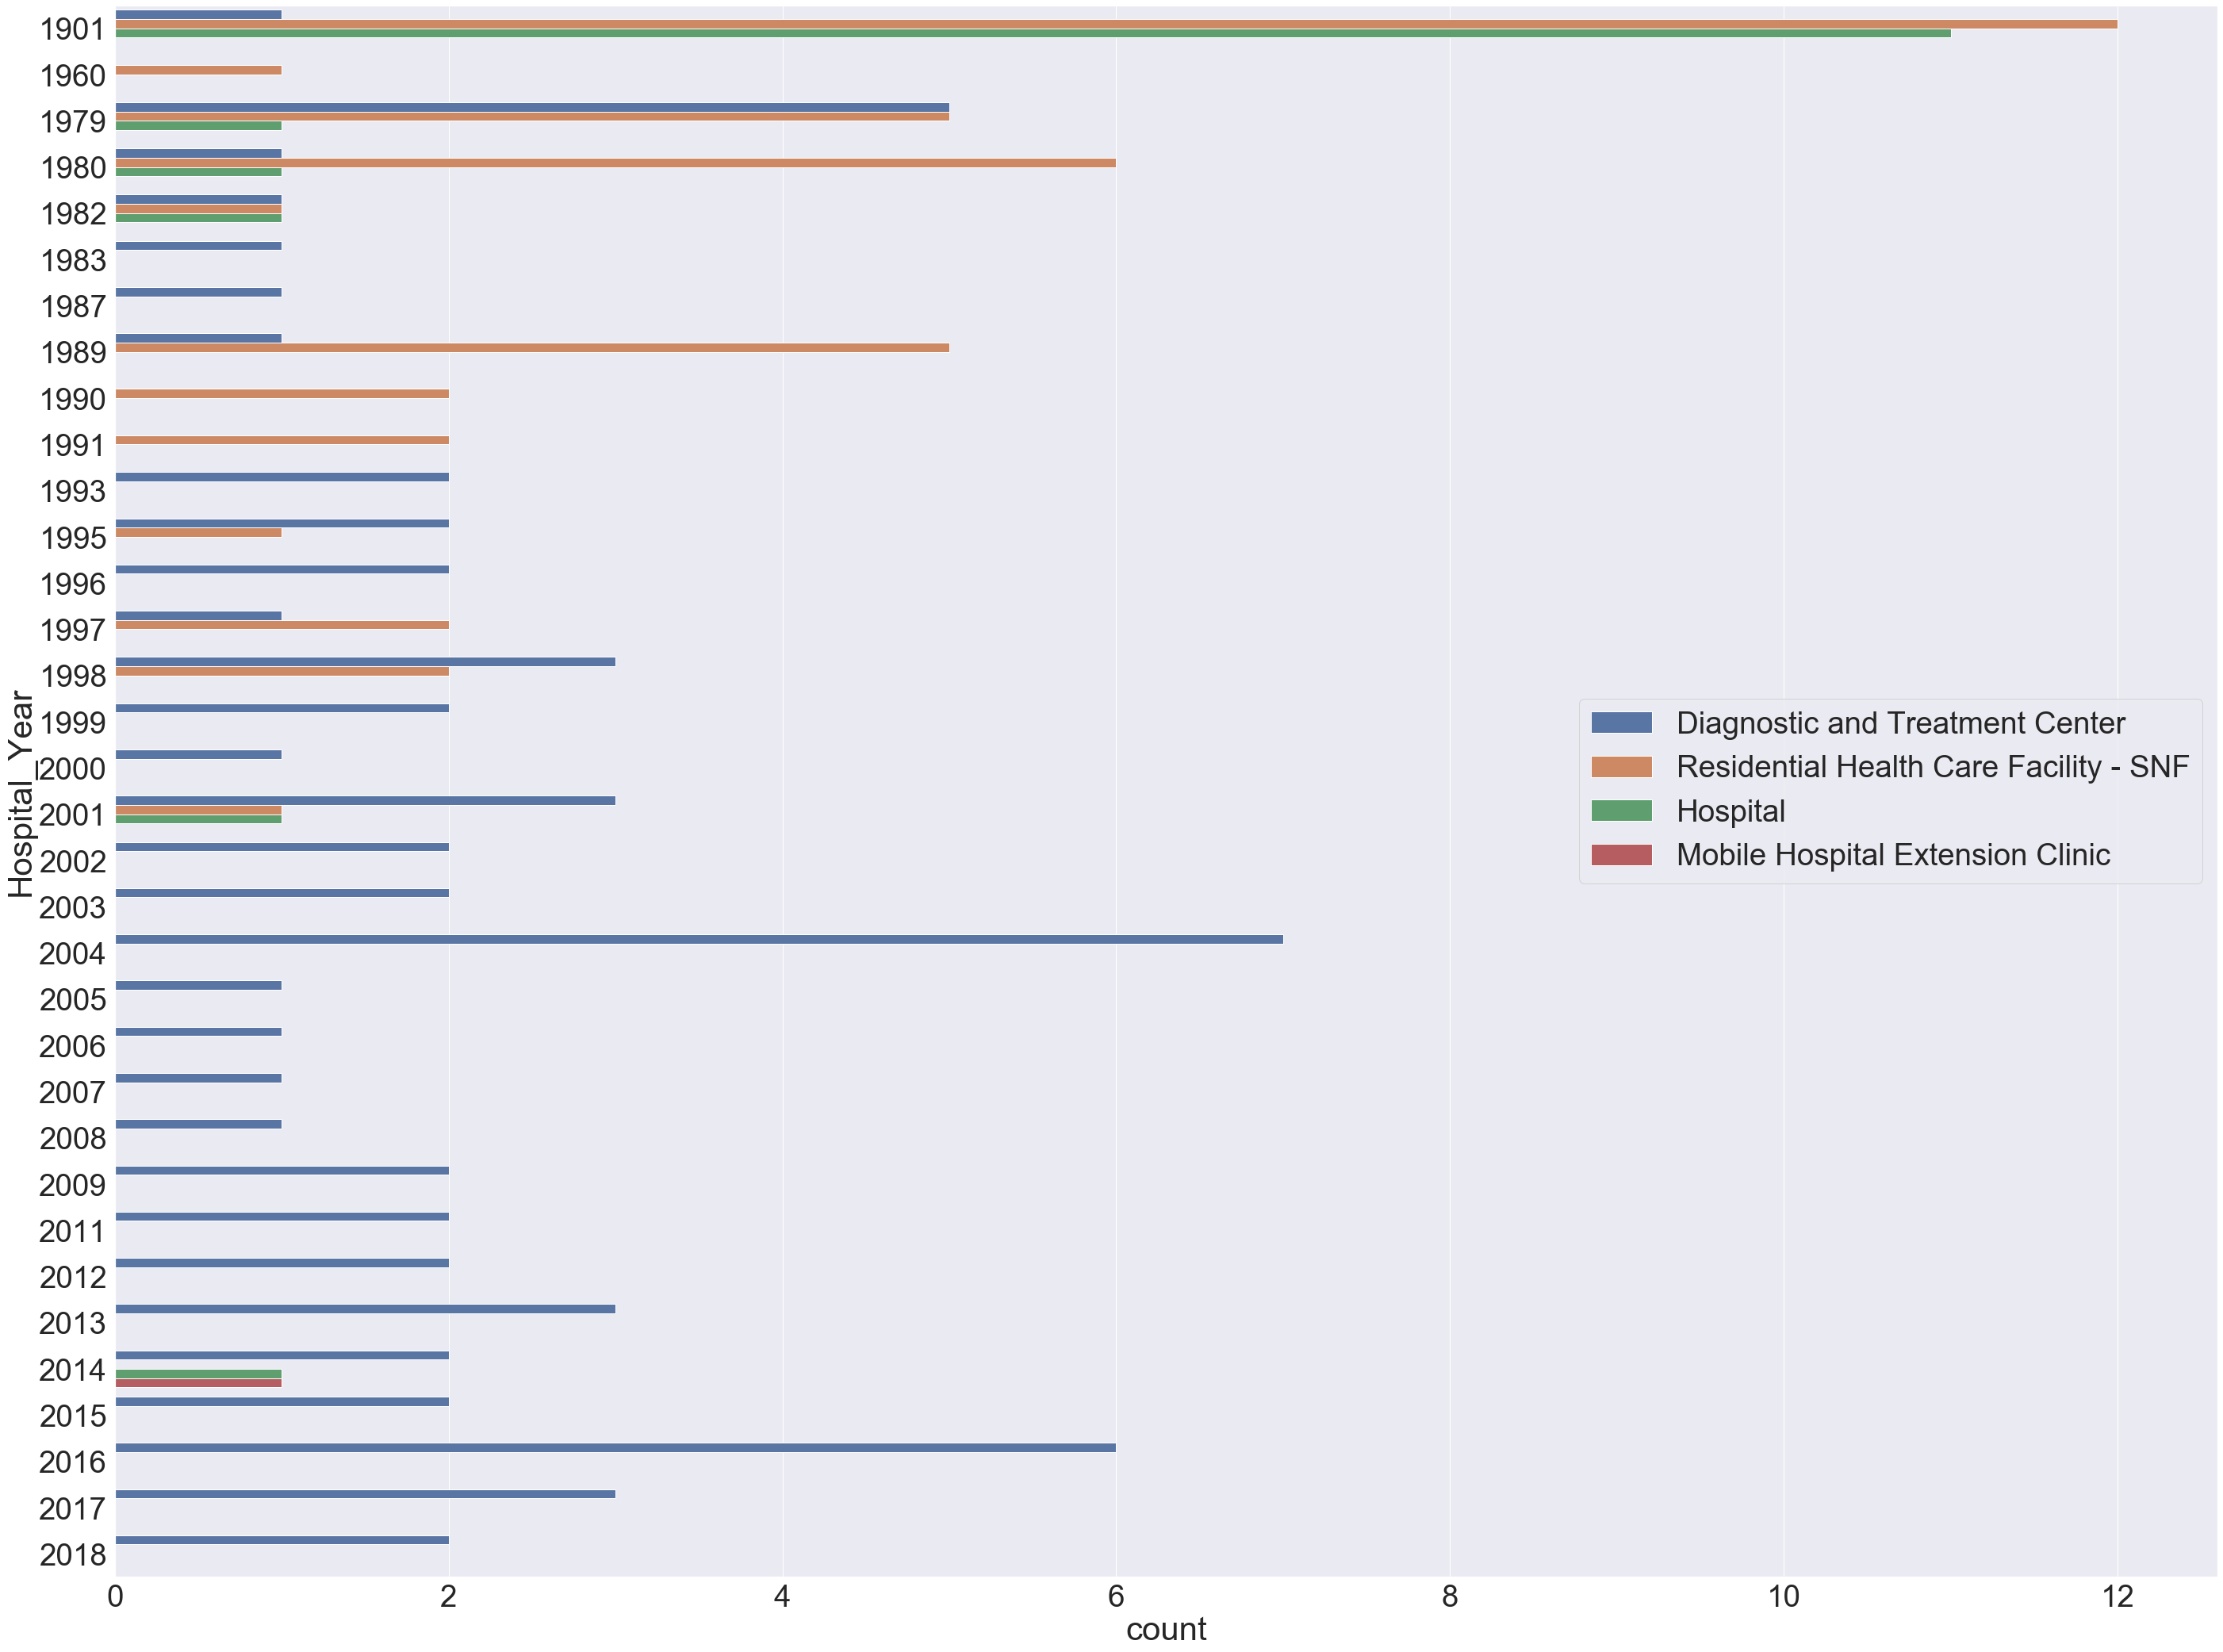

In [20]:
# Which is the most popular type of health facility from business point of view?
# Create a count plot of different kinds of health care facilities across different years from 1901 to 2019
plt.figure(figsize = (40,30))
sns.countplot(y = 'Hospital_Year', data = hospital_df, hue = 'Description')
sns.set(font_scale=3.5)
plt.tight_layout()
plt.legend(loc = 'center right')

Result of Analysis 1: It can be observed from the above plot that in the recent years, among all the health care facilities, a lot of diagnostic and treatment centers have been established since diagnostic and treatment centers are highly profitable source of revenue generation.

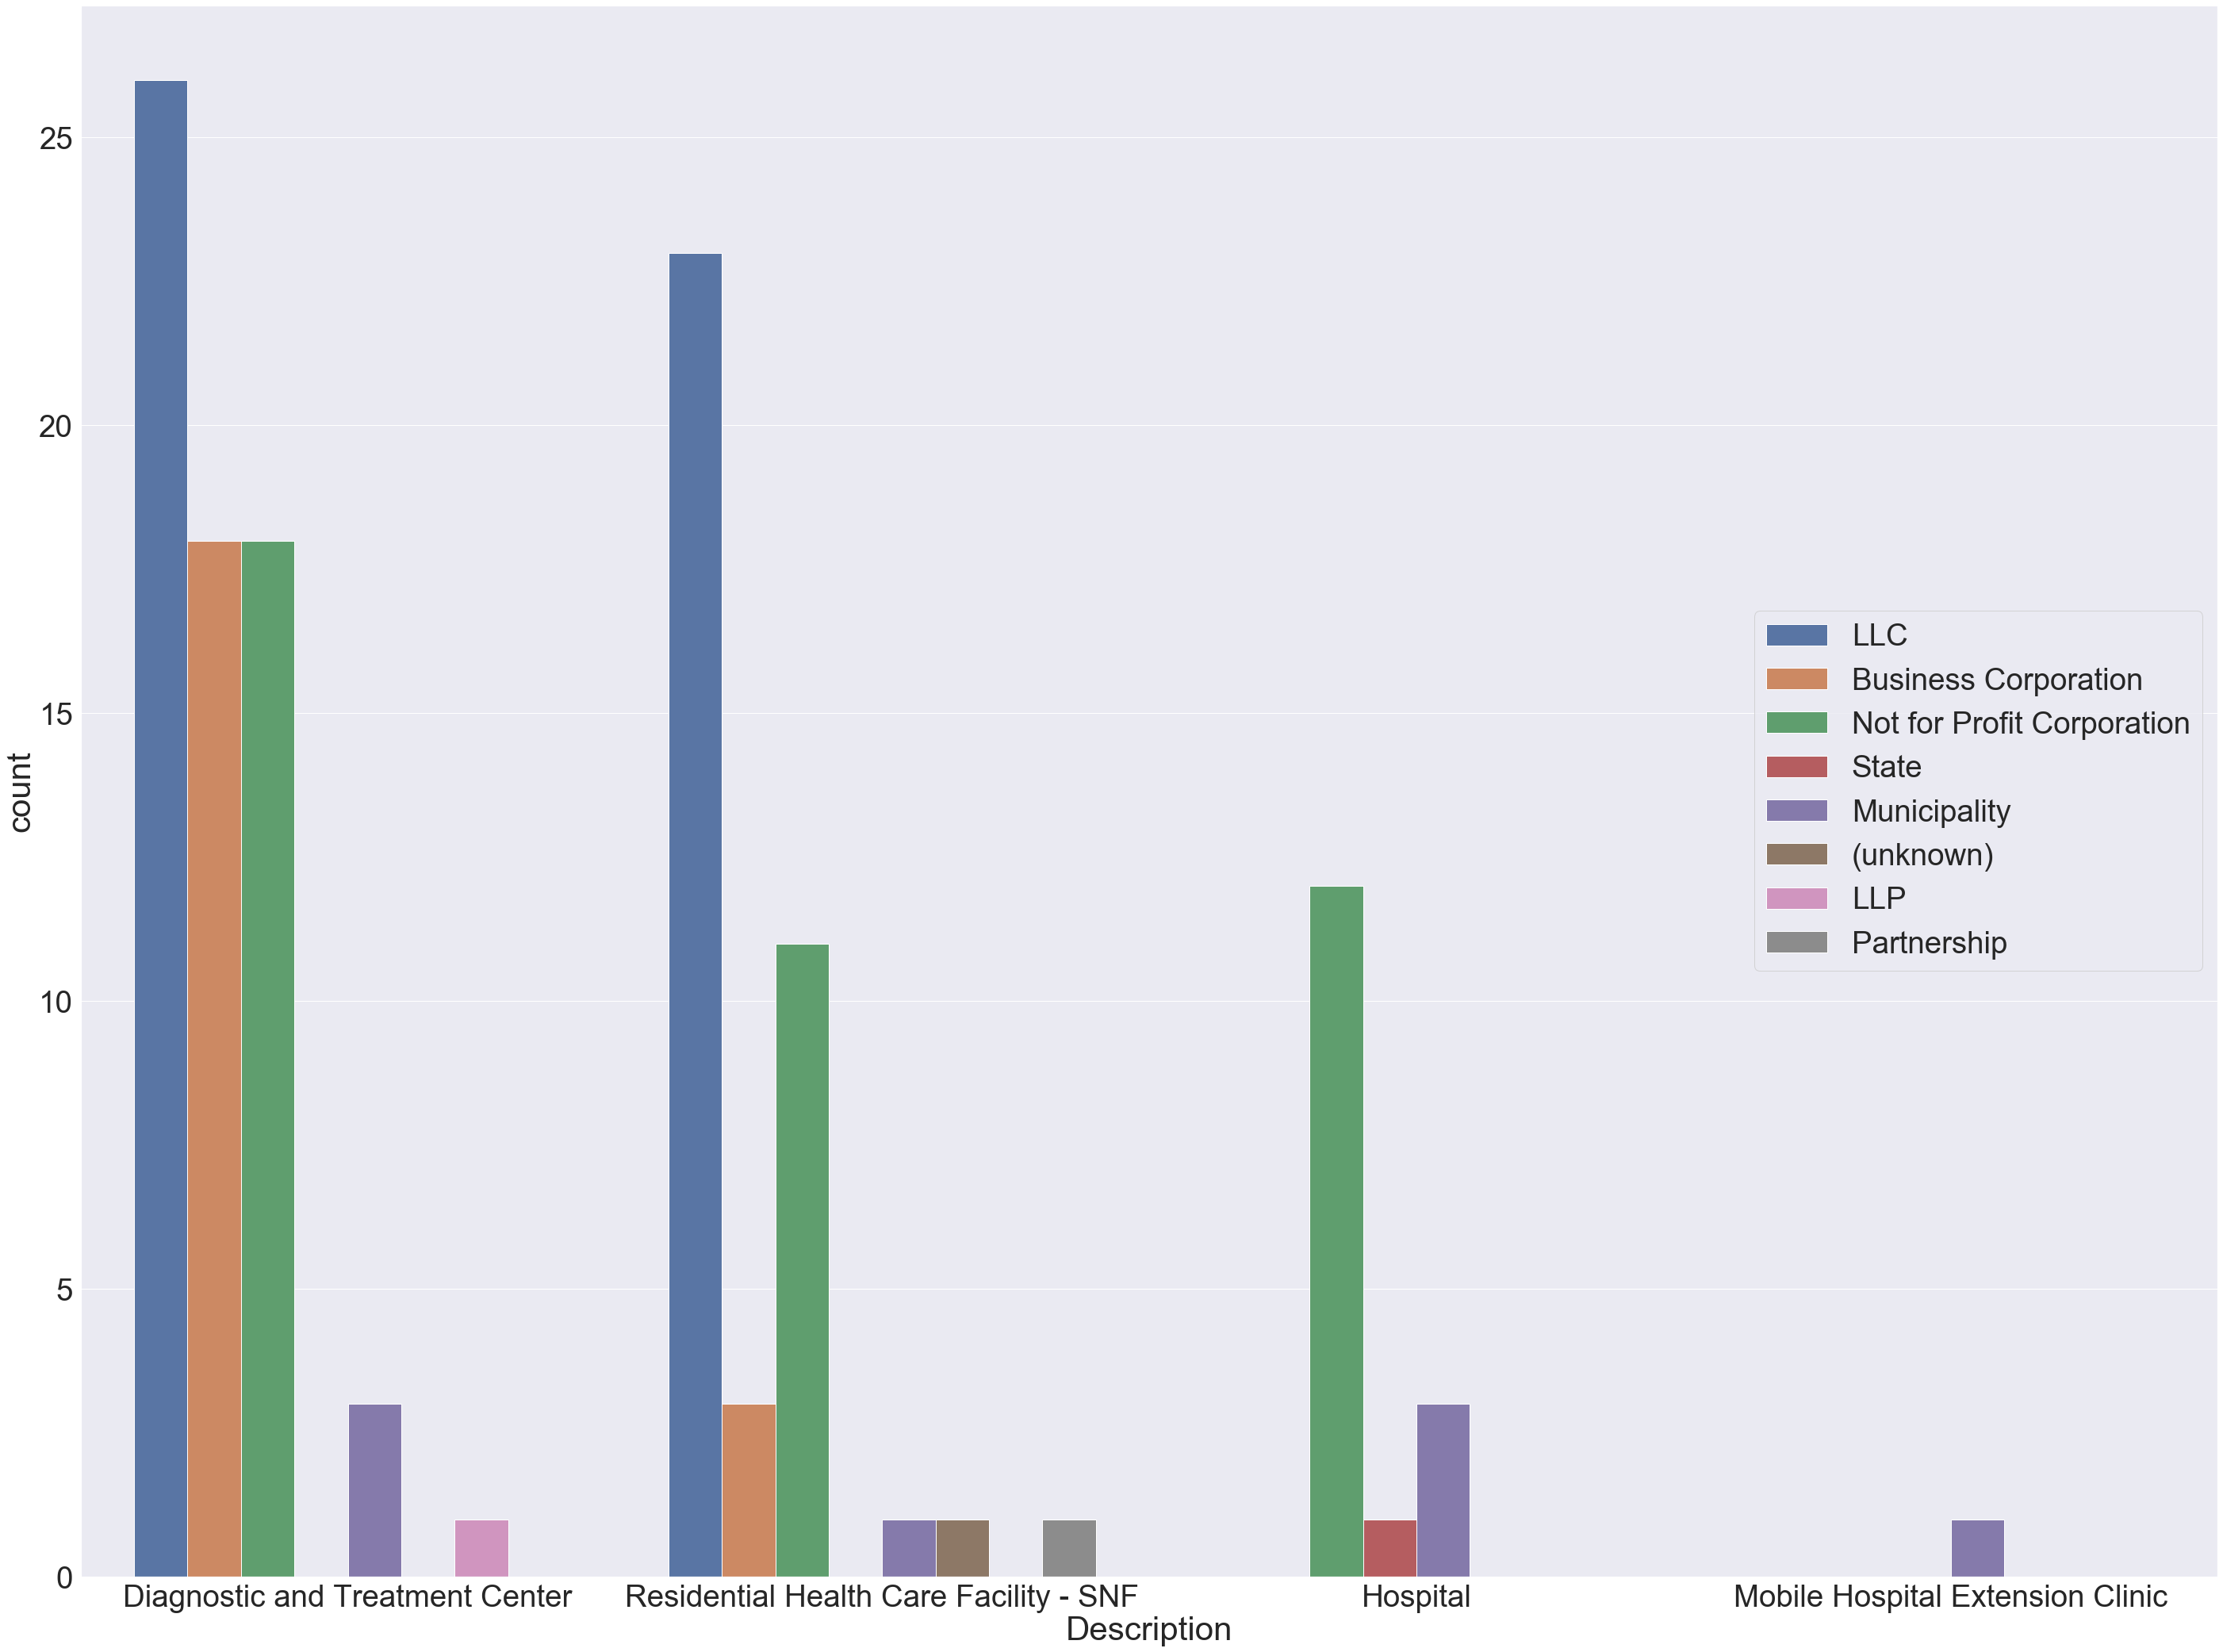

In [21]:
plt.figure(figsize = (40,30))
sns.countplot('Description', data = hospital_df, hue = 'Ownership Type')
sns.set(font_scale=3.5)
plt.tight_layout()
plt.legend(loc = 'center right')

Result of Analysis 2: Also it can be observed from the above plot that most of the business corporations and the LLC have focussed their efforts in developing more diagnostic and treatment centers along with some development of Residential health care facility -SNF as well.

### Generating a Map of Brooklyn with the health care facilities and their address superimposed on it.

In [22]:
#Fetching the latitude and longitude coordinates of Brooklyn
address = 'Brooklyn'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [23]:
hospital_df['Facility Latitude'] = hospital_df['Facility Latitude'].astype('float64')
hospital_df['Facility Longitude'] = hospital_df['Facility Longitude'].astype('float64')

In [24]:
hospital_df.dtypes # Checking to ensure that the Latitude and Longitudes are in the float data type

Facility Name          object
Facility City          object
Description            object
Facility Open Date     object
Facility Address 1     object
Facility State         object
Facility Zip Code      object
Facility Latitude     float64
Facility Longitude    float64
Ownership Type         object
Hospital_Year           int64
dtype: object

In [25]:
# create map of Brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, hospital, neighborhood in zip(hospital_df['Facility Latitude'], hospital_df['Facility Longitude'], hospital_df['Facility Name'], hospital_df['Facility Address 1']):
    label = '{}, {}'.format(hospital, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  

map_brooklyn

### Using FourSquare API to explore the neighborhoods around the diagnostic centers and segment them

Foursquare Credentials to be sent with HTTP request.

In [27]:
CLIENT_ID = '' # your Foursquare ID - rameshwar transauth
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Foursquare Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Foursquare Credentails:
CLIENT_ID: GEDMEW0JNYPP0BXH3GPFUJHTGMT3N3OM3MZDGJPFAKVYWCIU
CLIENT_SECRET:SHSZCYVGARNCRYADP33Y1QTARFJMBIRIMT4XGMKCV1Y5EEYJ


To analyze the surrounding venues in the neighborhood of different diagnostic centers, we fetch the top 100 venues that are within a radius of 500 meters of the Neighborhoods of selected facilities.

In [28]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # venues to be within this radius

venues_list = []

for lat, long, zipcode, city, neighborhood, hospital in zip(hospital_df['Facility Latitude'], hospital_df['Facility Longitude'], hospital_df['Facility Zip Code'], hospital_df['Facility City'], hospital_df['Facility Address 1'], hospital_df['Facility Name']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    venues_list.append([(
            zipcode, 
            city,
            neighborhood,
            hospital,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])


#for items in venues_list:
#    for item in items:
#        print(item)
nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Facility Zip Code', 'Facility City', 'Neighborhood', 'Hospital', 'Neighborhood_Latitude', 'Neighborhood_Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']


In [29]:
# Checking the first 5 rows of the nearby venues of different hospital surroundings
nearby_venues.head() 

Facility Zip Code Facility City           Neighborhood  \
0             11209      Brooklyn  370 Bay Ridge Parkway   
1             11209      Brooklyn  370 Bay Ridge Parkway   
2             11209      Brooklyn  370 Bay Ridge Parkway   
3             11209      Brooklyn  370 Bay Ridge Parkway   
4             11209      Brooklyn  370 Bay Ridge Parkway   

                 Hospital  Neighborhood_Latitude  Neighborhood_Longitude  \
0  Bay Ridge Surgi-Center              40.630716              -73.995995   
1  Bay Ridge Surgi-Center              40.630716              -73.995995   
2  Bay Ridge Surgi-Center              40.630716              -73.995995   
3  Bay Ridge Surgi-Center              40.630716              -73.995995   
4  Bay Ridge Surgi-Center              40.630716              -73.995995   

                       VenueName  VenueLatitude  VenueLongitude  \
0                       Tanoreen      40.630726      -74.027954   
1  Vesuvio Pizzeria & Restaurant      40.632580      -74.027096   
2                      Peppino's      40.629851      -74.028481   
3                 The Owl's Head      40.630454      -74.022623   
4                      Taj Mahal      40.632373      -74.027193   

         VenueCategory  
0  Lebanese Restaurant  
1          Pizza Place  
2          Pizza Place  
3             Wine Bar  
4    Indian Restaurant

In [30]:
nearby_venues.shape # Checking the size of the data frame

(4203, 10)

#### Let's check how many venues were returned for each Hospital, Neighborhood and Hospital

In [31]:
grouped_venues = nearby_venues.groupby(['Facility Zip Code', 'Neighborhood', 'Hospital'], as_index= False).count()

In [32]:
grouped_venues.head()

Facility Zip Code                   Neighborhood  \
0             11201              121 Dekalb Avenue   
1             11201          140 St Edwards Street   
2             11201               22 Chapel Street   
3             11201           295 Flatbush Ave Ext   
4             11201  295 Flatbush Avenue Extension   

                                            Hospital  Facility City  \
0         Brooklyn Hospital Center - Downtown Campus             79   
1      The Phoenix Rehabilitation and Nursing Center             39   
2                 START Treatment & Recovery Centers             51   
3  New York City Department of Health and Mental ...             91   
4         Public Health Solutions Fort Greene Center             91   

   Neighborhood_Latitude  Neighborhood_Longitude  VenueName  VenueLatitude  \
0                     79                      79         79             79   
1                     39                      39         39             39   
2                     51                      51         51             51   
3                     91                      91         91             91   
4                     91                      91         91             91   

   VenueLongitude  VenueCategory  
0              79             79  
1              39             39  
2              51             51  
3              91             91  
4              91             91

#### Checking the index of the above grouped dataframe with the highest number of venues

In [33]:
venue = grouped_venues['VenueCategory']

In [34]:
venue.idxmax()

54

#### Fetching the hospital name that has maximum number of venue categories in radius of 500m

In [35]:
grouped_venues.iloc[5,grouped_venues.columns.get_loc('Hospital')]

'Cobble Hill Health Center, Inc'

#### Let's find out how many unique categories can be curated from all the returned venues

In [36]:
print('There are {} uniques categories.'.format(len(nearby_venues['VenueCategory'].unique())))

There are 295 uniques categories.


### Analyzing each Neighborhood

In [37]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(nearby_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Facility Zip Code'] = nearby_venues['Facility Zip Code'] 
brooklyn_onehot['Hospital'] = nearby_venues['Hospital'] 

brooklyn_onehot['Neighborhoods'] = nearby_venues['Neighborhood']


#move neighborhood column to the first column
fixed_columns = list(brooklyn_onehot.columns[-3:]) + list(brooklyn_onehot.columns[:-3])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

Facility Zip Code                Hospital          Neighborhoods  \
0             11209  Bay Ridge Surgi-Center  370 Bay Ridge Parkway   
1             11209  Bay Ridge Surgi-Center  370 Bay Ridge Parkway   
2             11209  Bay Ridge Surgi-Center  370 Bay Ridge Parkway   
3             11209  Bay Ridge Surgi-Center  370 Bay Ridge Parkway   
4             11209  Bay Ridge Surgi-Center  370 Bay Ridge Parkway   

   Accessories Store  Adult Boutique  African Restaurant  American Restaurant  \
0                  0               0                   0                    0   
1                  0               0                   0                    0   
2                  0               0                   0                    0   
3                  0               0                   0                    0   
4                  0               0                   0                    0   

   Antique Shop  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0             0       0                 0                       0   
1             0       0                 0                       0   
2             0       0                 0                       0   
3             0       0                 0                       0   
4             0       0                 0                       0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   
1            0                    0                 0                   0   
2            0                    0                 0                   0   
3            0                    0                 0                   0   
4            0                    0                 0                   0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0          0           0       0     0    0               0                 0   
1          0           0       0     0    0               0                 0   
2          0           0       0     0    0               0                 0   
3          0           0       0     0    0               0                 0   
4          0           0       0     0    0               0                 0   

   Basketball Court  Basketball Stadium  Beach  Beer Bar  Beer Garden  \
0                 0                   0      0         0            0   
1                 0                   0      0         0            0   
2                 0                   0      0         0            0   
3                 0                   0      0         0            0   
4                 0                   0      0         0            0   

   Beer Store  Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  \
0           0              0                         0          0           0   
1           0              0                         0          0           0   
2           0              0                         0          0           0   
3           0              0                         0          0           0   
4           0              0                         0          0           0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  Boxing Gym  \
0       0              0          0         0              0           0   
1       0              0          0         0              0           0   
2       0              0          0         0              0           0   
3       0              0          0         0              0           0   
4       0              0          0         0              0           0   

   Breakfast Spot  Brewery  Bubble Tea Shop  Buffet  Building  Burger Joint  \
0               0        0                0       0         0             0   
1               0        0                0       0         0             0   
2               0        0                0       0         0             0   
3               0        0    

#### Next, we will group the rows by the facility zip code, hospital and neighborhoods and will take  the mean of the frequency of occurrence of each category so they can be sorted to give us the top ten most frequently occuring venues in the neighborhoods of the hospital

In [38]:
brooklyn_grouped = brooklyn_onehot.groupby(["Facility Zip Code", "Hospital", "Neighborhoods"]).mean().reset_index()
brooklyn_grouped

Facility Zip Code                                           Hospital  \
0               11201         Brooklyn Hospital Center - Downtown Campus   
1               11201                           CHC Surgical Center, LLC   
2               11201                     Cobble Hill Health Center, Inc   
3               11201                     NYU Langone Health-Cobble Hill   
4               11201  New York City Department of Health and Mental ...   
5               11201         Public Health Solutions Fort Greene Center   
6               11201                 START Treatment & Recovery Centers   
7               11201      The Phoenix Rehabilitation and Nursing Center   
8               11203  Dr Susan Smith Mckinney Nursing and Rehabilita...   
9               11203                       Kings County Hospital Center   
10              11203                   Kingsbrook Jewish Medical Center   
11              11203                         Rutland Nursing Home, Inc.   
12              11203                    University Hospital of Brooklyn   
13              11203                       Utica Avenue Dialysis Clinic   
14              11204                            Brooklyn Surgery Center   
15              11204                             Dialyze Direct NY, LLC   
16              11204                         ICL Healthcare Choices Inc   
17              11204                    South Brooklyn Endoscopy Center   
18              11205           Cumberland Diagnostic & Treatment Center   
19              11205                                        Medcare LLC   
20              11205                   ParCare Community Health Network   
21              11206            Woodhull Medical & Mental Health Center   
22              11207  Bushwick Center for Rehabilitation and Health ...   
23              11207             Bushwick Center for Renal Dialysis LLC   
24              11207              East NY Diagnostic & Treatment Center   
25              11207       Linden Center for Nursing and Rehabilitation   
26              11208                   Brookdale Family Care Center Inc   
27              11208              Brooklyn United Methodist Church Home   
28              11208       Brooklyn United Methodist Continuum Services   
29              11208                       Brooklyn-Queens Nursing Home   
30              11208                        Housing Works East New York   
31              11209                             Bay Ridge Surgi-Center   
32              11209  Endoscopic Ambulatory Specialty Center of Bay ...   
33              11209    Endoscopic Diagnostic and Treatment Center, LLC   
34              11210       Ahava Medical and Rehabilitation Center, LLC   
35              11210            Be Well Primary Health Care Center, LLC   
36              11210            GoldStep Ambulatory Surgery Center, LLC   
37              11211           Bedford Medical Family Health Center Inc   
38              11211               ODA Primary Health Care Network, Inc   
39              11212      Brookdale Physicians Dialysis Associates, Inc   
40              11212     Brownsville Multi-Service Family Health Center   
41              11212  Schulman and Schachne Institute for Nursing An...   
42         11212-3139                  Brookdale Hospital Medical Center   
43              11213  Crown Heights Center for Nursing and Rehabilit...   
44              11213                          Interfaith Medical Center   
45              11214  Bensonhurst Center for Rehabilitation and Heal...   
46              11214           Brooklyn Comprehensive Care Center, Inc.   
47              11214                         Gastroenterology Care, Inc   
48              11214                     Haym Solomon Home for the Aged   
49              11214   King David Center for Nursing and Rehabilitation   
50              11215   NewYork-Presbyterian Brooklyn Methodist Hospital   
51              11216        Bedford Stuyvesant Fami

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Fetching the top ten most frequently occuring venues in the neighborhoods of the hospitals

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Facility Zip Code','Hospital','Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Facility Zip Code'] = brooklyn_grouped['Facility Zip Code']
neighborhoods_venues_sorted['Hospital'] = brooklyn_grouped['Hospital']
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhoods']


for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 3:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Facility Zip Code                                           Hospital  \
0             11201         Brooklyn Hospital Center - Downtown Campus   
1             11201                           CHC Surgical Center, LLC   
2             11201                     Cobble Hill Health Center, Inc   
3             11201                     NYU Langone Health-Cobble Hill   
4             11201  New York City Department of Health and Mental ...   

           Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0     121 Dekalb Avenue           Coffee Shop    Italian Restaurant   
1      79 Bridge Street           Art Gallery           Coffee Shop   
2      380 Henry Street           Coffee Shop            Playground   
3       83 Amity Street    Italian Restaurant           Coffee Shop   
4  295 Flatbush Ave Ext           Coffee Shop                   Gym   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0                   Bar  Performing Arts Venue   Arts & Crafts Store   
1           Yoga Studio         Scenic Lookout                   Gym   
2           Pizza Place                    Bar         Grocery Store   
3             Wine Shop            Pizza Place            Playground   
4         Grocery Store     Chinese Restaurant    Italian Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0             Bookstore   Japanese Restaurant           Opera House   
1             Wine Shop   American Restaurant          Antique Shop   
2             Wine Shop        Ice Cream Shop          Cocktail Bar   
3          Cocktail Bar             Bookstore         Deli / Bodega   
4       Thai Restaurant            Food Truck       Bubble Tea Shop   

  9th Most Common Venue 10th Most Common Venue  
0    Chinese Restaurant         Sandwich Place  
1                  Park             Boxing Gym  
2    Italian Restaurant             Bagel Shop  
3          Gourmet Shop          Grocery Store  
4      Asian Restaurant                    Spa

### Cluster Neighborhoods
The KMeans Algorithm will be used to cluster the diagnostic centers into different clusters. Based on the surrounding venues in each cluster, a plan will be proposed for the development of a new diagnostic center

In [41]:
# set number of clusters
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop(['Facility Zip Code', 'Hospital','Neighborhoods'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3])

In [42]:
# add clustering labels
neighborhoods_venues_sorted['Cluster Labels']= kmeans.labels_

brooklyn_merged = hospital_df

# merge brooklyn_grouped with hospital_df to add latitude/longitude, city, state and description 
#for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.drop(['Hospital','Neighborhood'], 1).set_index('Facility Zip Code'), on='Facility Zip Code')
brooklyn_merged.tail() # check the last columns!

Facility Name Facility City  \
122  Haym Solomon Home for the Aged      Brooklyn   
122  Haym Solomon Home for the Aged      Brooklyn   
122  Haym Solomon Home for the Aged      Brooklyn   
122  Haym Solomon Home for the Aged      Brooklyn   
122  Haym Solomon Home for the Aged      Brooklyn   

                                Description Facility Open Date  \
122  Residential Health Care Facility - SNF         10/01/1960   
122  Residential Health Care Facility - SNF         10/01/1960   
122  Residential Health Care Facility - SNF         10/01/1960   
122  Residential Health Care Facility - SNF         10/01/1960   
122  Residential Health Care Facility - SNF         10/01/1960   

      Facility Address 1 Facility State Facility Zip Code  Facility Latitude  \
122  2340 Cropsey Avenue       New York             11214          40.594852   
122  2340 Cropsey Avenue       New York             11214          40.594852   
122  2340 Cropsey Avenue       New York             11214          40.594852   
122  2340 Cropsey Avenue       New York             11214          40.594852   
122  2340 Cropsey Avenue       New York             11214          40.594852   

     Facility Longitude Ownership Type  Hospital_Year 1st Most Common Venue  \
122          -73.995995    Partnership           1960                Bakery   
122          -73.995995    Partnership           1960      Asian Restaurant   
122          -73.995995    Partnership           1960                  Bank   
122          -73.995995    Partnership           1960           Pizza Place   
122          -73.995995    Partnership           1960           Pizza Place   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
122   Japanese Restaurant    Italian Restaurant           Pizza Place   
122        Sandwich Place                   Spa           Bus Station   
122                Bakery    Chinese Restaurant  Cantonese Restaurant   
122       Warehouse Store      Department Store            Donut Shop   
122       Warehouse Store        Ice Cream Shop            Donut Shop   

    5th Most Common Venue        6th Most Common Venue 7th Most Common Venue  \
122              Pharmacy  Eastern European Restaurant                  Bank   
122  Cantonese Restaurant             Sushi Restaurant              Pharmacy   
122      Sushi Restaurant            Mobile Phone Shop       Bubble Tea Shop   
122     German Restaurant         Fast Food Restaurant            Theme Park   
122             Surf Spot               Shopping Plaza  Fast Food Restaurant   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
122            Donut Shop               Butcher      Convenience Store   
122             Pet Store          Dessert Shop       Malay Restaurant   
122            Shoe Store            Kids Store            Pizza Place   
122          Burger Joint     Electronics Store              Surf Spot   
122     German Restaurant          Liquor Store           Burger Joint   

     Cluster Labels  
122               0  
122               0  
122               0  
122               1  
122               1

In [43]:
#Fetching geographical coordinates of Brooklyn
address = 'Brooklyn'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [44]:
brooklyn_merged.reset_index(drop=True, inplace=True)

In [45]:
brooklyn_merged.head(2)

Facility Name Facility City                      Description  \
0  Bay Ridge Surgi-Center      Brooklyn  Diagnostic and Treatment Center   
1  Bay Ridge Surgi-Center      Brooklyn  Diagnostic and Treatment Center   

  Facility Open Date     Facility Address 1 Facility State Facility Zip Code  \
0         11/23/2018  370 Bay Ridge Parkway       New York             11209   
1         11/23/2018  370 Bay Ridge Parkway       New York             11209   

   Facility Latitude  Facility Longitude Ownership Type  Hospital_Year  \
0          40.630716          -74.025721            LLC           2018   
1          40.630716          -74.025721            LLC           2018   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0           Pizza Place            Bagel Shop                   Bar   
1           Pizza Place            Bagel Shop                Bakery   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                Bakery   American Restaurant            Hookah Bar   
1                   Bar    Italian Restaurant          Liquor Store   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Italian Restaurant        Sandwich Place          Liquor Store   
1            Hookah Bar   American Restaurant    Turkish Restaurant   

  10th Most Common Venue  Cluster Labels  
0               Pharmacy               0  
1         Sandwich Place               0

### Creating a Cluster Map of Brooklyn with the hospitals and their clusters superimposed on it

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, hospital, address, cluster in zip(brooklyn_merged['Facility Latitude'], brooklyn_merged['Facility Longitude'], brooklyn_merged['Facility Name'], brooklyn_merged['Facility Address 1'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup('{} Address: {} - Cluster {}'.format(hospital, address, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining the Clusters:

Cluster 1 consist of surrounding venues such as Pizza place, restaurants, parks, grocery stores. There is also residential building and apartment/ condos observed in the neighborhoods in this cluster. This might be prove convenient for the staff that will work to be able to live close to work or those living in the area to visit the diagnostic center. The cluster 1 is one of the biggest clusters and consist  of all the different types of health care facilities such hospitals, residential health care facility and diagnsotic centers. There is not much information on the transport connectivity. Therefore, we might need more information to further explore the neighborhoods in this cluster for establishing a new diagnostic and treatment center.

In [47]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[0,1,2,3,4] + list(range(9, brooklyn_merged.shape[1]))]]

Facility Name Facility City  \
0                               Bay Ridge Surgi-Center      Brooklyn   
1                               Bay Ridge Surgi-Center      Brooklyn   
2                               Bay Ridge Surgi-Center      Brooklyn   
4              All City Family Healthcare Center, Inc.      Brooklyn   
6              All City Family Healthcare Center, Inc.      Brooklyn   
8              All City Family Healthcare Center, Inc.      Brooklyn   
14         Sea Crest Nursing and Rehabilitation Center      Brooklyn   
15         Sea Crest Nursing and Rehabilitation Center      Brooklyn   
16         Sea Crest Nursing and Rehabilitation Center      Brooklyn   
25                            Brooklyn Dialysis Center      Brooklyn   
26                            Brooklyn Dialysis Center      Brooklyn   
27                            Brooklyn Dialysis Center      Brooklyn   
29   Schulman and Schachne Institute for Nursing An...      Brooklyn   
31               Central Brooklyn Dialysis Center, LLC      Brooklyn   
32               Central Brooklyn Dialysis Center, LLC      Brooklyn   
33               Central Brooklyn Dialysis Center, LLC      Brooklyn   
34                     University Hospital of Brooklyn      Brooklyn   
40                                    Mobile Medical 4      Brooklyn   
41                                    Mobile Medical 4      Brooklyn   
42                                    Mobile Medical 4      Brooklyn   
47    King David Center for Nursing and Rehabilitation      Brooklyn   
48    King David Center for Nursing and Rehabilitation      Brooklyn   
49    King David Center for Nursing and Rehabilitation      Brooklyn   
52   Bushwick Center for Rehabilitation and Health ...      Brooklyn   
53   Bushwick Center for Rehabilitation and Health ...      Brooklyn   
54   Bushwick Center for Rehabilitation and Health ...      Brooklyn   
59   The Heritage Rehabilitation and Health Care Ce...      Brooklyn   
61            Island Ambulatory Surgery Center, L.L.C.      Brooklyn   
63            Island Ambulatory Surgery Center, L.L.C.      Brooklyn   
65                      Cobble Hill Health Center, Inc      Brooklyn   
66                      Cobble Hill Health Center, Inc      Brooklyn   
67                      Cobble Hill Health Center, Inc      Brooklyn   
68                      Cobble Hill Health Center, Inc      Brooklyn   
69                      Cobble Hill Health Center, Inc      Brooklyn   
70                      Cobble Hill Health Center, Inc      Brooklyn   
71                      Cobble Hill Health Center, Inc      Brooklyn   
72                      Cobble Hill Health Center, Inc      Brooklyn   
74           Menorah Home & Hospital for Aged & Infirm      Brooklyn   
75           Menorah Home & Hospital for Aged & Infirm      Brooklyn   
76           Menorah Home & Hospital for Aged & Infirm      Brooklyn   
77           Menorah Home & Hospital for Aged & Infirm      Brooklyn   
78           Menorah Home & Hospital for Aged & Infirm      Brooklyn   
79                  START Treatment & Recovery Centers      Brooklyn   
80                  START Treatment & Recovery Centers      Brooklyn   
81                  START Treatment & Recovery Centers      Brooklyn   
82                  START Treatment & Recovery Centers      Brooklyn   
83                  START Treatment & Recovery Centers      Brooklyn   
84                  START Treatment & Recovery Centers      Brooklyn   
85                  START Treatment & Recovery Centers      Brooklyn   
86                  START Treatment & Recovery Centers      Brooklyn   
94          Greater New York Endoscopy Surgical Center      Brooklyn   
95          Greater New York Endoscopy Surgical Center      Brooklyn   
96          Greater New York Endoscopy Surgical Center      Brooklyn   
97          Greater New York Endoscopy Surgical Center      Brooklyn   
98          Greater New York Endoscopy Surgical Center      Brooklyn   
101      

Cluster 2 neighborhoods have surrounding venues such as pharmacy, metro stations, bus stops, grocery stores, parks, banks, pizza places and other restaurants. This cluster has a very number of already established diagnostic centers. This might pose significant competition for a new business to start a new diagnostic center. However, this cluster also has connectivity for transit and have good surrounding venues that may prove beneficial for facilitating a new business in this cluster.

In [48]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[0,1,2,3,4] + list(range(9, brooklyn_merged.shape[1]))]]

Facility Name Facility City  \
3              All City Family Healthcare Center, Inc.      Brooklyn   
5              All City Family Healthcare Center, Inc.      Brooklyn   
7              All City Family Healthcare Center, Inc.      Brooklyn   
9              All City Family Healthcare Center, Inc.      Brooklyn   
10     Hamilton Park Nursing and Rehabilitation Center      Brooklyn   
12                       Physicare Multi-Services, Ltd      Brooklyn   
13                       Physicare Multi-Services, Ltd      Brooklyn   
36                     University Hospital of Brooklyn      Brooklyn   
37                     University Hospital of Brooklyn      Brooklyn   
50    King David Center for Nursing and Rehabilitation      Brooklyn   
51    King David Center for Nursing and Rehabilitation      Brooklyn   
55   Bushwick Center for Rehabilitation and Health ...      Brooklyn   
56   The Heritage Rehabilitation and Health Care Ce...      Brooklyn   
57   The Heritage Rehabilitation and Health Care Ce...      Brooklyn   
58   The Heritage Rehabilitation and Health Care Ce...      Brooklyn   
60            Island Ambulatory Surgery Center, L.L.C.      Brooklyn   
62            Island Ambulatory Surgery Center, L.L.C.      Brooklyn   
87              HASC Diagnostic & Treatment Center Inc      Brooklyn   
88              HASC Diagnostic & Treatment Center Inc      Brooklyn   
89              HASC Diagnostic & Treatment Center Inc      Brooklyn   
90              HASC Diagnostic & Treatment Center Inc      Brooklyn   
91              HASC Diagnostic & Treatment Center Inc      Brooklyn   
92              HASC Diagnostic & Treatment Center Inc      Brooklyn   
99                     South Brooklyn Endoscopy Center      Brooklyn   
100                    South Brooklyn Endoscopy Center      Brooklyn   
103       New York Community Hospital of Brooklyn, Inc      Brooklyn   
105       New York Community Hospital of Brooklyn, Inc      Brooklyn   
107       New York Community Hospital of Brooklyn, Inc      Brooklyn   
109       New York Community Hospital of Brooklyn, Inc      Brooklyn   
128                        Brooklyn Eye Surgery Center      Brooklyn   
129                        Brooklyn Eye Surgery Center      Brooklyn   
130                        Brooklyn Eye Surgery Center      Brooklyn   
131                        Brooklyn Eye Surgery Center      Brooklyn   
132                        Brooklyn Eye Surgery Center      Brooklyn   
133                        Brooklyn Eye Surgery Center      Brooklyn   
141         Norwegian Christian Home and Health Center      Brooklyn   
142         Norwegian Christian Home and Health Center      Brooklyn   
143         Norwegian Christian Home and Health Center      Brooklyn   
147  Dr Susan Smith Mckinney Nursing and Rehabilita...      Brooklyn   
148  Dr Susan Smith Mckinney Nursing and Rehabilita...      Brooklyn   
157                      Sheepshead Bay Surgery Center      Brooklyn   
159                      Sheepshead Bay Surgery Center      Brooklyn   
161                      Sheepshead Bay Surgery Center      Brooklyn   
163                      Sheepshead Bay Surgery Center      Brooklyn   
166                              Lasante Health Center      Brooklyn   
168                              Lasante Health Center      Brooklyn   
176                             Dialyze Direct NY, LLC      Brooklyn   
177                             Dialyze Direct NY, LLC      Brooklyn   
193                                     Premium Health      Brooklyn   
194                                     Premium Health      Brooklyn   
195                                     Premium Health      Brooklyn   
196                                     Premium Health      Brooklyn   
197                                     Premium Health      Brooklyn   
198                                     Premium Health      Brooklyn   
202              East NY Diagnostic & Treatment Center      Brooklyn   
205      

Cluster 3 has the lowest number of health facilities in it. Though there are restaurants and pharmacy in the surrounding neighborhoods, there is not much information on the transit connectivity. Therefore, this cluster might not be a good choise based on foursquare API information alone.

In [49]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[0,1,2,3,4] + list(range(9, brooklyn_merged.shape[1]))]]

Facility Name Facility City  \
17         Sea Crest Nursing and Rehabilitation Center      Brooklyn   
18         Sea Crest Nursing and Rehabilitation Center      Brooklyn   
19         Sea Crest Nursing and Rehabilitation Center      Brooklyn   
43                                    Mobile Medical 4      Brooklyn   
44                                    Mobile Medical 4      Brooklyn   
45                                    Mobile Medical 4      Brooklyn   
114                          A Merryland Health Center      Brooklyn   
115                          A Merryland Health Center      Brooklyn   
116                          A Merryland Health Center      Brooklyn   
254                  Community Health Initiatives Inc.      Brooklyn   
255                  Community Health Initiatives Inc.      Brooklyn   
256                  Community Health Initiatives Inc.      Brooklyn   
266          Seagate Rehabilitation and Nursing Center      Brooklyn   
267          Seagate Rehabilitation and Nursing Center      Brooklyn   
268          Seagate Rehabilitation and Nursing Center      Brooklyn   
364  Saints Joachim & Anne Nursing and Rehabilitati...      Brooklyn   
365  Saints Joachim & Anne Nursing and Rehabilitati...      Brooklyn   
366  Saints Joachim & Anne Nursing and Rehabilitati...      Brooklyn   
474                          Sea Crest Dialysis Center      Brooklyn   
475                          Sea Crest Dialysis Center      Brooklyn   
476                          Sea Crest Dialysis Center      Brooklyn   

                                Description Facility Open Date  \
17   Residential Health Care Facility - SNF         08/01/1979   
18   Residential Health Care Facility - SNF         08/01/1979   
19   Residential Health Care Facility - SNF         08/01/1979   
43         Mobile Hospital Extension Clinic         05/23/2014   
44         Mobile Hospital Extension Clinic         05/23/2014   
45         Mobile Hospital Extension Clinic         05/23/2014   
114         Diagnostic and Treatment Center         11/04/2005   
115         Diagnostic and Treatment Center         11/04/2005   
116         Diagnostic and Treatment Center         11/04/2005   
254         Diagnostic and Treatment Center         03/24/2016   
255         Diagnostic and Treatment Center         03/24/2016   
256         Diagnostic and Treatment Center         03/24/2016   
266  Residential Health Care Facility - SNF         02/01/1979   
267  Residential Health Care Facility - SNF         02/01/1979   
268  Residential Health Care Facility - SNF         02/01/1979   
364  Residential Health Care Facility - SNF         02/04/1991   
365  Residential Health Care Facility - SNF         02/04/1991   
366  Residential Health Care Facility - SNF         02/04/1991   
474         Diagnostic and Treatment Center         09/18/2017   
475         Diagnostic and Treatment Center         09/18/2017   
476         Diagnostic and Treatment Center         09/18/2017   

                     Facility Address 1              Ownership Type  \
17                    3035 West 24th St                         LLC   
18                    3035 West 24th St                         LLC   
19                    3035 West 24th St                         LLC   
43                2905 West 19th Street                Municipality   
44                2905 West 19th Street                Municipality   
45                2905 West 19th Street                Municipality   
114            1704-1706 Mermaid Avenue                         LLC   
115            1704-1706 Mermaid Avenue                         LLC   
116            1704-1706 Mermaid Avenue                         LLC   
254  2882 West 15th Street, Lower Level  Not for Profit Corporation   
255  2882 West 15th Street, Lower Level  Not for Profit Corporation   
256  2882 West 15th Street, Lower Level  Not for Profit Corporation   
266                        3015 W 29 St                         LLC   
267      

Cluster 4 seems to be closer to the beach with pharmacy and super market and Deli in surrounding areas. The cluster mainly consist of residential health care facilities with few diagnostic and treatment centers. The cluster seems to be more isolated on map as well. It might be convenient for those who live in the area to visit the diagnostic centers established in this cluster. But based on foursqaure API information alone, this cluster will not be the wisest choice for establishing a new diagnostic center as there is no information on transit connectivity in this cluster and other residential areas surrounding it.

In [50]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[0,1,2,3,4] + list(range(9, brooklyn_merged.shape[1]))]]

Facility Name Facility City  \
11                       Physicare Multi-Services, Ltd      Brooklyn   
20         Sea Crest Nursing and Rehabilitation Center      Brooklyn   
21        Atrium Center for Rehabilitation and Nursing      Brooklyn   
22        Atrium Center for Rehabilitation and Nursing      Brooklyn   
23        Atrium Center for Rehabilitation and Nursing      Brooklyn   
24        Atrium Center for Rehabilitation and Nursing      Brooklyn   
28   Schulman and Schachne Institute for Nursing An...      Brooklyn   
30   Schulman and Schachne Institute for Nursing An...      Brooklyn   
35                     University Hospital of Brooklyn      Brooklyn   
38                     University Hospital of Brooklyn      Brooklyn   
39                     University Hospital of Brooklyn      Brooklyn   
46                                    Mobile Medical 4      Brooklyn   
64            Island Ambulatory Surgery Center, L.L.C.      Brooklyn   
117                          A Merryland Health Center      Brooklyn   
139            Be Well Primary Health Care Center, LLC      Brooklyn   
140            Be Well Primary Health Care Center, LLC      Brooklyn   
146  Dr Susan Smith Mckinney Nursing and Rehabilita...      Brooklyn   
149  Dr Susan Smith Mckinney Nursing and Rehabilita...      Brooklyn   
150  Dr Susan Smith Mckinney Nursing and Rehabilita...      Brooklyn   
156  Spring Creek Rehabilitation & Nursing Care Center      Brooklyn   
165                              Lasante Health Center      Brooklyn   
167                              Lasante Health Center      Brooklyn   
169              Brooklyn United Methodist Church Home      Brooklyn   
173              Brooklyn United Methodist Church Home      Brooklyn   
204                       Utica Avenue Dialysis Clinic      Brooklyn   
207                       Utica Avenue Dialysis Clinic      Brooklyn   
208                       Utica Avenue Dialysis Clinic      Brooklyn   
214                               IDCC Health Services      Brooklyn   
216     Four Seasons Nursing and Rehabilitation Center      Brooklyn   
217     Four Seasons Nursing and Rehabilitation Center      Brooklyn   
218     Four Seasons Nursing and Rehabilitation Center      Brooklyn   
219     Four Seasons Nursing and Rehabilitation Center      Brooklyn   
224                     City Wide Health Facility Inc.      Brooklyn   
228         Brook Plaza Ambulatory Surgical Center Inc      Brooklyn   
232  Caton Park Rehabilitation and Nursing Center, LLC      Brooklyn   
234  Caton Park Rehabilitation and Nursing Center, LLC      Brooklyn   
237                       Kings County Hospital Center      Brooklyn   
240                       Kings County Hospital Center      Brooklyn   
241                       Kings County Hospital Center      Brooklyn   
246                          Interfaith Medical Center      Brooklyn   
257                  Community Health Initiatives Inc.      Brooklyn   
259              NY Congregational Nursing Center, Inc      Brooklyn   
261              NY Congregational Nursing Center, Inc      Brooklyn   
269          Seagate Rehabilitation and Nursing Center      Brooklyn   
270   Brooklyn Gardens Nursing & Rehabilitation Center      Brooklyn   
271   Brooklyn Gardens Nursing & Rehabilitation Center      Brooklyn   
272                            Gateway Dialysis Center      Brooklyn   
273                            Gateway Dialysis Center      Brooklyn   
274                            Gateway Dialysis Center      Brooklyn   
275                            Gateway Dialysis Center      Brooklyn   
285                            Ditmas Park Care Center      Brooklyn   
287                            Ditmas Park Care Center      Brooklyn   
293  Crown Heights Center for Nursing and Rehabilit...      Brooklyn   
306      Brookdale Physicians Dialysis Associates, Inc      Brooklyn   
308      Brookdale Physicians Dialysis Associates, Inc      Brooklyn   
309      

Cluster 5 neighborhoods has the highest number of health care facilities in it. The surrounding venues in the neighborhoods mainly consist of cafe, restaurants, banks, pharmacy, bus stations, and some residential buidings too. There could be significant competition posed by other diagnostic centers in this cluster but this cluster has the most promising surroundings to establish a new diagnostic and treatment center.

In [51]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[0,1,2,3,4] + list(range(9, brooklyn_merged.shape[1]))]]

Facility Name Facility City  \
73    Menorah Home & Hospital for Aged & Infirm      Brooklyn   
93   Greater New York Endoscopy Surgical Center      Brooklyn   
319      New York Artificial Kidney Center, Inc      Brooklyn   
414  Sheepshead Nursing & Rehabilitation Center      Brooklyn   
449                       Coney Island Hospital      Brooklyn   
513  Shore View Nursing & Rehabilitation Center      Brooklyn   

                                Description Facility Open Date  \
73   Residential Health Care Facility - SNF         06/28/1982   
93          Diagnostic and Treatment Center         04/03/2009   
319         Diagnostic and Treatment Center         03/20/2002   
414  Residential Health Care Facility - SNF         08/01/1979   
449                                Hospital         01/01/1901   
513  Residential Health Care Facility - SNF         01/01/1901   

           Facility Address 1              Ownership Type  Hospital_Year  \
73    1516 Oriental Boulevard  Not for Profit Corporation           1982   
93         2211 Emmons Avenue                         LLC           2009   
319        2701 Emmons Avenue        Business Corporation           2002   
414             2840 Knapp St                         LLC           1979   
449        2601 Ocean Parkway                Municipality           1901   
513  2865 Brighton 3rd Street                         LLC           1901   

    1st Most Common Venue 2nd Most Common Venue        3rd Most Common Venue  \
73    Japanese Restaurant           Supermarket  Eastern European Restaurant   
93    Japanese Restaurant           Supermarket  Eastern European Restaurant   
319   Japanese Restaurant           Supermarket  Eastern European Restaurant   
414   Japanese Restaurant           Supermarket  Eastern European Restaurant   
449   Japanese Restaurant           Supermarket  Eastern European Restaurant   
513   Japanese Restaurant           Supermarket  Eastern European Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
73      Convenience Store            Bagel Shop           Yoga Studio   
93      Convenience Store            Bagel Shop           Yoga Studio   
319     Convenience Store            Bagel Shop           Yoga Studio   
414     Convenience Store            Bagel Shop           Yoga Studio   
449     Convenience Store            Bagel Shop           Yoga Studio   
513     Convenience Store            Bagel Shop           Yoga Studio   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
73            Fish Market  Fast Food Restaurant                 Field   
93            Fish Market  Fast Food Restaurant                 Field   
319           Fish Market  Fast Food Restaurant                 Field   
414           Fish Market  Fast Food Restaurant                 Field   
449           Fish Market  Fast Food Restaurant                 Field   
513           Fish Market  Fast Food Restaurant                 Field   

    10th Most Common Venue  Cluster Labels  
73     Filipino Restaurant               4  
93     Filipino Restaurant               4  
319    Filipino Restaurant               4  
414    Filipino Restaurant               4  
449    Filipino Restaurant               4  
513    Filipino Restaurant               4

### Conclusion:
Overall we can see that cluster 5 seems to be a good choice and after that cluster 2 and cluster 1 seems to be promising avenues for further exploration of the neighborhoods based on the Foursquare API information. However, we can not get complete information by using Foursquare API alone for making further conclusions on the best neighborhoods for establishing a new business. If we can further combine the data with data from transit companies and residential data for the city in different neighborhoods, then we might be able to make fair conclusions.